In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/gender_submission.csv
data/test.csv
data/train.csv


In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women) / len(women)
print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex=='male']["Survived"]
rate_men = sum(men) / (len(men))

print("% men who survived: ", rate_men)

% men who survived:  0.18890814558058924


In [12]:
! pip install -U scikit-learn

/bin/bash: /home/nobu/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 8.8 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [6]:
# check data
#from preprocess_data import *
features = ["Pclass", "Sex", "SibSp", "Parch"]

trainDataFeatures = train_data[features]
trainDataFeatures.head()

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0


In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)


RandomForestClassifier(max_depth=5, random_state=1)

In [8]:
XDum = pd.get_dummies(X)
XDum.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True


In [9]:
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId':test_data.PassengerId, "Survived":predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
output.to_csv('submission.csv', index=False)

# Try using TF Keras to predict 

In [10]:
# X and X_test but X_test does not have Survived so cannot validate
import pandas as pd
from IPython.display import display



In [11]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

train_X = np.asarray(train_X).astype(np.float32)
val_X = np.asarray(val_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
val_y = np.asarray(val_y).astype(np.float32)

# check the shape of the input
print(train_X.shape, train_y.shape)
trainXDf = pd.DataFrame(train_X)
trainXDf.head()
#print(train_X.head())

(668, 5) (668,)


,0,1,2,3,4
0,3.0,0.0,0.0,0.0,1.0
1,3.0,4.0,2.0,1.0,0.0
2,3.0,1.0,0.0,0.0,1.0
3,3.0,0.0,0.0,0.0,1.0
4,2.0,0.0,0.0,1.0,0.0


In [12]:
# scale to normal distribution
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_val = sc.fit_transform(val_X)

XtrainDf = pd.DataFrame(X_train)
XtrainDf.head()

,0,1,2,3,4
0,0.830129,-0.460372,-0.477210,-0.727052,0.727052
1,0.830129,2.985323,1.956196,1.375418,-1.375418
2,0.830129,0.401052,-0.477210,-0.727052,0.727052
3,0.830129,-0.460372,-0.477210,-0.727052,0.727052
4,-0.364971,-0.460372,-0.477210,1.375418,-1.375418


In [13]:
from tensorflow import keras
from tensorflow.keras import layers 

num_nodes = 128

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[5]),
    layers.Dense(num_nodes, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_nodes, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

2023-05-12 19:30:28.911165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 19:30:30.150717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-12 19:30:31.775800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-12 19:30:32.236060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-12 19:30:32.236130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_exec

In [14]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, train_y,
    validation_data=(X_val, val_y),
    batch_size=512, # try differnt batch size
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
    
)

2023-05-12 19:30:36.590177: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3e04029350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-12 19:30:36.590230: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-05-12 19:30:36.642030: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-12 19:30:36.970585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-12 19:30:37.471897: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Best validation loss: 0.5313
Best Validation Accuracy:0.8027


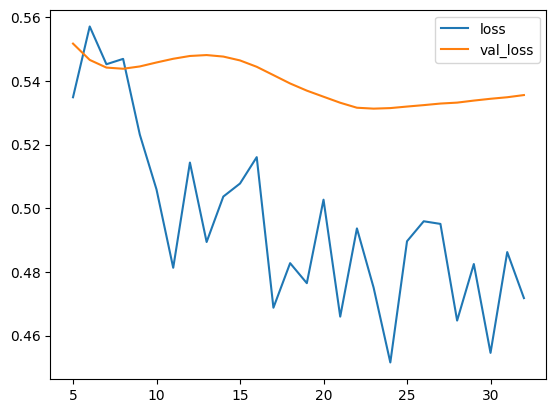

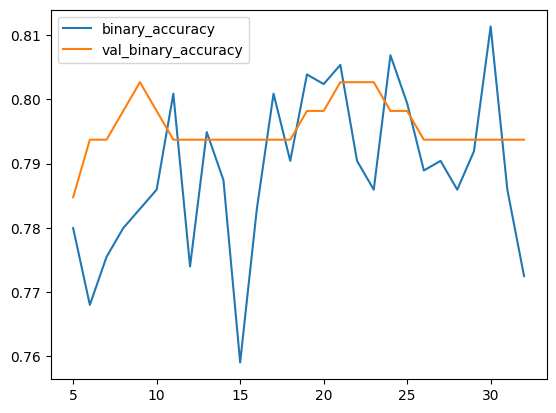

In [16]:
history_df = pd.DataFrame(history.history)

history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best validation loss: {:0.4f}" +\
    "\nBest Validation Accuracy:{:0.4f}")\
        .format(history_df['val_loss'].min(),
                history_df['val_binary_accuracy'].max()))

In [17]:
# preprocess test X_test
Xtest = np.asarray(X_test).astype(np.float32)
Xtest = sc.fit_transform(Xtest)
tfPrediction = model.predict(Xtest)

output = pd.DataFrame({'PassengerId':test_data.PassengerId, "Survived":predictions})
output.head()

14/14 [==============================] - 0s 3ms/step


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
# put this submission in own folder
output.to_csv('submissions/tf/submission.csv', index=False)

# Pytorch

In [12]:
! pip install tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.1 MB/s eta 0:00:0000:0100:01
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached Werkzeug-2.3.4-py3-none-any.whl (242 kB)
  Using cached grpcio-1.54.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached tensorboard_data_server-0.7.0-py3-none-manylinux2014_x86_64.whl (6.6 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 5.5 MB/s eta 0:00:00
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstalling google-auth-2.6.0:
      Successfully uninstalled google-auth-2.6.0


In [19]:
! pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scipy-1.10.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv("data/train.csv")

test_data = pd.read_csv("data/test.csv")

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

train_X = np.asarray(train_X).astype(np.float32)
val_X = np.asarray(val_X).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
val_y = np.asarray(val_y).astype(np.float32)

sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_val = sc.fit_transform(val_X)

X_test = np.asarray(X_test).astype(np.float32)
X_test = sc.fit_transform(X_test)

In [33]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


In [77]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [86]:
'''
transform = transforms.Compose(
    [transforms.ToTensor()]
)
'''

X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(train_y)
X_val_tensor = torch.from_numpy(X_val)
y_val_tensor = torch.from_numpy(val_y)

X_train_gpu, y_train_gpu = X_train_tensor.to(device), y_train_tensor.to(device)
X_val_gpu, y_val_gpu = X_val_tensor.to(device), y_val_tensor.to(device)
#https://stackoverflow.com/a/66971839/9481613

training_labelled = [*zip(X_train_tensor, y_train_tensor)]
validation_labelled = [*zip(X_val_tensor, y_val_tensor)]

training_loader = DataLoader(training_labelled, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_labelled, batch_size=64, shuffle=False)

print(X_train_gpu.shape, X_train_gpu)
print(len(training_labelled), training_labelled)


torch.Size([668, 5]) tensor([[ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271],
        [ 0.8301,  2.9853,  1.9562,  1.3754, -1.3754],
        [ 0.8301,  0.4011, -0.4772, -0.7271,  0.7271],
        ...,
        [ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271],
        [ 0.8301,  0.4011, -0.4772,  1.3754, -1.3754],
        [-0.3650,  0.4011,  0.7395, -0.7271,  0.7271]], device='cuda:0')
668 [(tensor([ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271]), tensor(0.)), (tensor([ 0.8301,  2.9853,  1.9562,  1.3754, -1.3754]), tensor(1.)), (tensor([ 0.8301,  0.4011, -0.4772, -0.7271,  0.7271]), tensor(0.)), (tensor([ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271]), tensor(0.)), (tensor([-0.3650, -0.4604, -0.4772,  1.3754, -1.3754]), tensor(1.)), (tensor([ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271]), tensor(1.)), (tensor([ 0.8301,  0.4011,  0.7395, -0.7271,  0.7271]), tensor(0.)), (tensor([ 0.8301, -0.4604, -0.4772, -0.7271,  0.7271]), tensor(0.)), (tensor([-0.3650,  0.4011,  1.9562,  1.3754, -1.3754]), tenso

Using cuda device


In [93]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.BatchNorm1d(5),
            nn.Linear(5,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(p=0.2),
            nn.Linear(128,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        #x.to(device)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [94]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=5, out_features=128, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=128, out_features=1, bias=True)
    (6): Sigmoid()
  )
)


In [95]:
#loss_fn = torch.nn.functional.binary_cross_entropy()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [96]:
def train_one_epoch(epoch_idx, tb_writer):
    running_loss = 0.
    last_loss = 0.
    
    # use enumerate(training loader) instead of
    # iter(training_loader) to track batch idx and 
    # do intra-epoch reporting
    #for i, data in enumerate(training_loader):
    #for i, data in iter(training_labelled):
    for i in range(len(X_train_gpu)):
        inputs, labels = X_train_gpu[i], y_train_gpu[i]
        #inputs.to(device)
        #labels.to(device)
        #zero out gradient each batch
        optimizer.zero_grad()
        
        #predict
        outputs = model(inputs)
        #print(f'outputs: {outputs}')
        #outputs.to('cpu')
        #compute loss and gradients
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        #adjust learning weights
        optimizer.step()
        
        #gather data and report
        running_loss += loss.item()
        '''
        if i % 1000 == 999:
            last_loss = running_loss / 1000
            print(f'   batch{i+1} loss: {last_loss}')
            tb_x = epoch_idx * len(training_loader) + i + 1
            tb_writer.add_scalar('loss/train', last_loss, tb_x)
            running_loss = 0.
        ''' 
    return last_loss 


In [98]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter(f'runs/titanic_pytorch_trainer_{timestamp}')
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)
    
    # don't need gradients on to do reporting
    model.train(False)
    
    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        vinputs.to(device)
        vlabels.to(device) 
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss 
        
    avg_vloss = running_vloss / (i + 1)
    print(f'LOSS train {avg_loss} valid {avg_vloss}')
    
    # log running loss averaged per batch for training and validation
    writer.add_scalars('Training vs. Validation Loss',
                       {'Training': avg_loss, 'Validation': avg_vloss},
                       epoch_number + 1)
    writer.flush()
    
    # track best performance and save model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = f'model_{timestamp}_{epoch_number}'
        torch.save(model.state_dict(), model_path)
    
    epoch_number += 1
    

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)